In [2]:
path_new = '/home/us441/nvidia-collab/vlad/models/fixed_fm/model=fwd-cnn-layers=3-bsize=8-ncond=20-npred=20-lrt=0.0001-nfeature=256-dropout=0.1-gclip=5.0-warmstart=0-seed=1.log'
path_old = '/home/us441/nvidia-collab/models_v10/model=fwd-cnn-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature=256-dropout=0.05-gclip=5.0-warmstart=0-seed=1.log'

In [3]:
with open(path_new, 'r') as f:
    newl = f.readlines()

In [12]:
import re
s = re.compile(r'.*step\s(?P<step>\d+).*train\sloss\s\[i:\s(?P<train_i>[\d.]+).*s:\s(?P<train_s>[\d.]+).*p:\s([\d.]+)\].*valid\sloss\s\[i:\s(?P<val_i>[\d.]+).*s:\s(?P<val_s>[\d.]+).*p:\s([\d.]+)\]')


In [25]:
import pandas as pd

def extract(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    p = []
    for l in lines:
        r = s.match(l)
        d = {'step':int(r['step']), 
            'train_s': float(r['train_s']),
            'train_i': float(r['train_i']),
            'val_s': float(r['val_s']),
            'val_i': float(r['val_i']),
            }
        p.append(d)
    return pd.DataFrame(p)

new = extract(path_new)
old = extract(path_old)


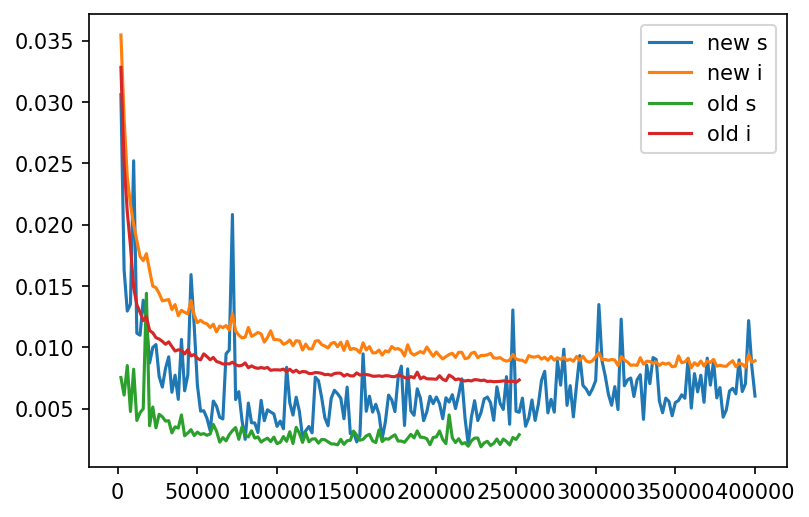

In [28]:
from matplotlib import pyplot as plt
plt.figure(dpi=150)
plt.plot(new['step'], new['val_s'], label='new s')
plt.plot(new['step'], new['val_i'], label='new i')
plt.plot(old['step'], old['val_s'], label='old s')
plt.plot(old['step'], old['val_i'], label='old i')
plt.legend()